# Task 1 - Prediction Using supervised ML

### Import Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

### Read Data

In [4]:
df = pd.read_csv('http://bit.ly/w-data')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [60]:
# check null values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [62]:
#Check duplicates
df.duplicated().sum()

0

In [6]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### EDA

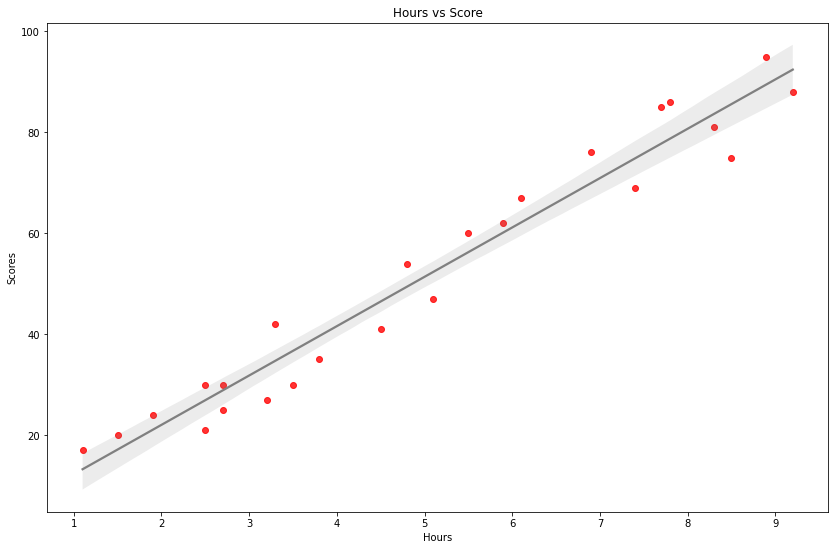

In [16]:
plt.figure(figsize=(14,9))
sns.regplot(data=df , x = 'Hours' , y = 'Scores',scatter_kws= {'color':'red'} , line_kws= {'color':'grey'})
plt.title('Hours vs Score') 
plt.show()

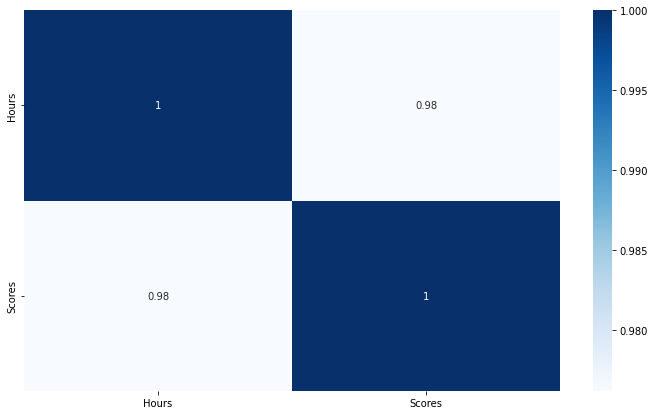

In [67]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

### Splitting data

In [85]:
from sklearn.model_selection import train_test_split

x = df.Hours.values.reshape(-1,1)
y = df.Scores.values.reshape(-1,1)

x_train , x_test , y_train , y_test = train_test_split(x , y ,random_state= 0,test_size= 0.2)

### Building Model

In [86]:
from sklearn.linear_model import LinearRegression

Reg = LinearRegression()

Reg.fit(x_train,y_train)

LinearRegression()

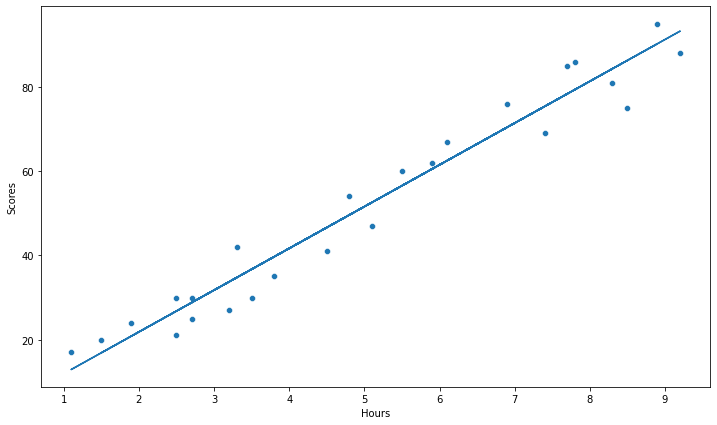

In [87]:
model  = Reg.intercept_ + Reg.coef_ * x

plt.figure(figsize=(12,7))
sns.scatterplot(data=df , x = 'Hours' , y = 'Scores')
plt.plot(x , model)
plt.show()

## Evaluate Model

In [88]:
from sklearn.metrics import r2_score , mean_squared_error

y_pred = Reg.predict(x_test)

print('R2-score: ', r2_score(y_test,y_pred))
print('MSE: ', mean_squared_error(y_test,y_pred))

R2-score:  0.9454906892105356
MSE:  21.5987693072174


## What will be predicted score if a student studies 9.25 hours/day ?

In [95]:
pred = Reg.predict([[9.25]])[0][0].round(2)
print('when he studies for 9.25 hour, the score will be: ', pred)

when he studies for 9.25 hour, the score will be:  93.69
